# Convolutional Neural Networks - MNIST Dataset

Convolutional neural networks have been shown to be very successful in image recognition. A MLP is fully connected by each layer, for an image this can result in a huge ammount of weights to be learned, especially if the imagine is RGB you have 3x the amount of pixels. This can result in huge amounts of weights to learn.

On the other hand a convolutional neural net will use a "filter" to scan the images. This is essentially looking over smaller portions of an image so maybe a 3x3 section of the picture. This allows for nearby pixels to be more strongly related than further away pixels, this means the model learns relationships between certain parts of images for example the shape of an eye when recognising a face.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
from tensorflow.keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

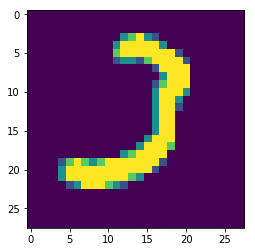

In [4]:
from matplotlib import pyplot as plt
import random
i = random.randint(1,60000)
plt.imshow(x_train[i])

In [5]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
input_shape = (1, 28, 28)


In [6]:
model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.fit(x_train, y_train, 
          #batch_size=32, epochs=10, verbose=1)

#score = model.evaluate(x_test, y_test, verbose=0)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.fit(x_train, y_train, batch_size= 32 ,epochs=10, verbose=1)

ValueError: Error when checking input: expected conv2d_input to have shape (28, 28, 1) but got array with shape (1, 28, 28)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)